#Algoritmo CART (classification and regresion tree)

Se busca entrenar un modelo para categorizar la información encontrando la frontera de desición, permite tener una mejor interpretabilidad que las redes neuronales dado que se puede tener una represetancion grafica del proceso de desiscion secuencial.

- ref https://www.youtube.com/watch?v=kqaLlte6P6o&ab_channel=CodificandoBits
- Hand on Machine leargning 




Dado un conjunto de caracteristicas se establece una condición que realiza 
una particion binaria de los datos a clasificar repitiendo hasta encontrar 
particiones lo más homogenea posible.




array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

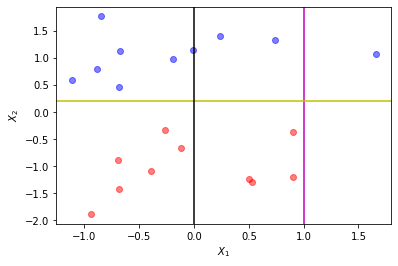

In [20]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X0, y0 = make_classification(n_samples=20,
    n_features=2, n_redundant=0, n_informative=1, random_state=1, 
    n_clusters_per_class=1)

x=np.arange(-2, 3,1)
x_,y_ = np.meshgrid(x,x)

fig, ax = plt.subplots()
ax.plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
ax.plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)
#ax.plot(x_,y_,"k.")

ax.axvline(x = 1, color = 'm', label="x1<=1")
ax.axhline(y = 0.2, color = 'y', label="x2<0.2")
ax.axvline(x = 0.0, color = 'k', label="x2<0.2")
#plt.legend(loc=3)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
X0[:,0][y0==0]
y0


- Gini index


$G = 1 - (PC_1)^2 - (PC_2)^2$

$PC_1$: Probablidad categoria 1 

$PC_2$: Probablidad categoria 2 

Si :

- $G=0$ nodos puros, datos que pertenecen a una sola categoría

- Gini > 0 son nodos con impurezas, con mas de una categoría


La partición purpura  y amarilla del gráfico anterior representan nodos puros.

Mientras que la linea negra define:

- 7 puntos son de color azul.

- 6 puntos de color rojo.

$G = 1 - (7/13)^{2} - (6/13)^{2}$

mientrás que la ponderacion viene dada por:

$m = (7/20+7/20)=7/10$



No:

$G=1-(3/7)^{2}-(4/7)^{2}$
m = (3/20+4/20)


La funcion de coste, asocida al nodo padre:

$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right} $



# Algoritmo
1. Calcular todos los posibles condiciones. 
2. Calcular los indices de Gini.
3. Encontrar la funcion de coste 
4. Escoger la menor funcion de coste 
5. Repetir.


# Laboratorio

1. Importar iris dataset 
2. Generar una intuición respecto a iris dataset. Ver laboratorio anterior.
3. Dividir el *dataset* empleanto el metodo train_test_split de sklearn
4. Dentro de sklearn, aplicar el algoritmo DecisionTreeClassifier.
5. Para el clasificador analice el gráfico de desición:

```

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
  graph=tree.plot_tree(clf,class_names = iris.target_names,\
                feature_names = iris.feature_names,\
                impurity=False, filled=True,rounded=True )

```

6. Características importantes.

```
clf.feature_importances_
caract = iris.data.shape[1]
plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
```

7. Fronteras de desición.



```
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()
```


In [5]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pylab as plt
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
import graphviz
#from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd
import seaborn as sns


# 1. Importación del set Iris

In [6]:
iris_set=datasets.load_iris()
iris_df=pd.DataFrame(iris_set.data, columns=iris_set.feature_names)

In [7]:
iris_types=['Iris_setosa', 'Iris_virginica', 'Iris_versicolor']
iris_df['species']=[iris_set.target_names[i] for i in iris_set.target]
iris_df.species.value_counts()
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

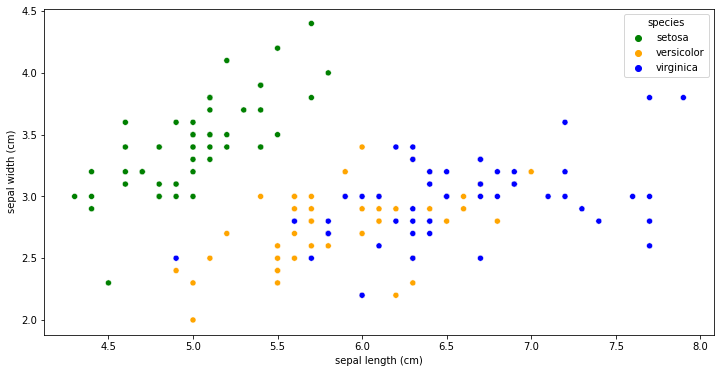

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=iris_df["sepal length (cm)"], y=iris_df["sepal width (cm)"], hue=iris_df['species'], palette=['green', 'orange', 'blue'])

# 3. División del  dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    iris_set.data, iris_set.target, test_size=0.33, random_state=42
)

# 4. Decision Tree Classifier with parameter optimization

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
parameters = {
    "max_depth": (3, 4, 5, 6, 7, 8, 9),
    "criterion": ("gini", "entropy"),
    "max_features": ("sqrt", "log2"),
    "min_samples_split": (2, 4, 6),
} #parámetros a optimizar 

DT_grid = RandomizedSearchCV(
    DecisionTreeClassifier(), param_distributions=parameters, cv=5, verbose=True
)
DT_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 4, 5, 6, 7, 8, 9),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [15]:
DT_grid.best_estimator_ #hiperparámetros óptimos

DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_split=6)

In [16]:
tree_clf=DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_split=6)
model=tree_clf.fit(x_train,y_train)


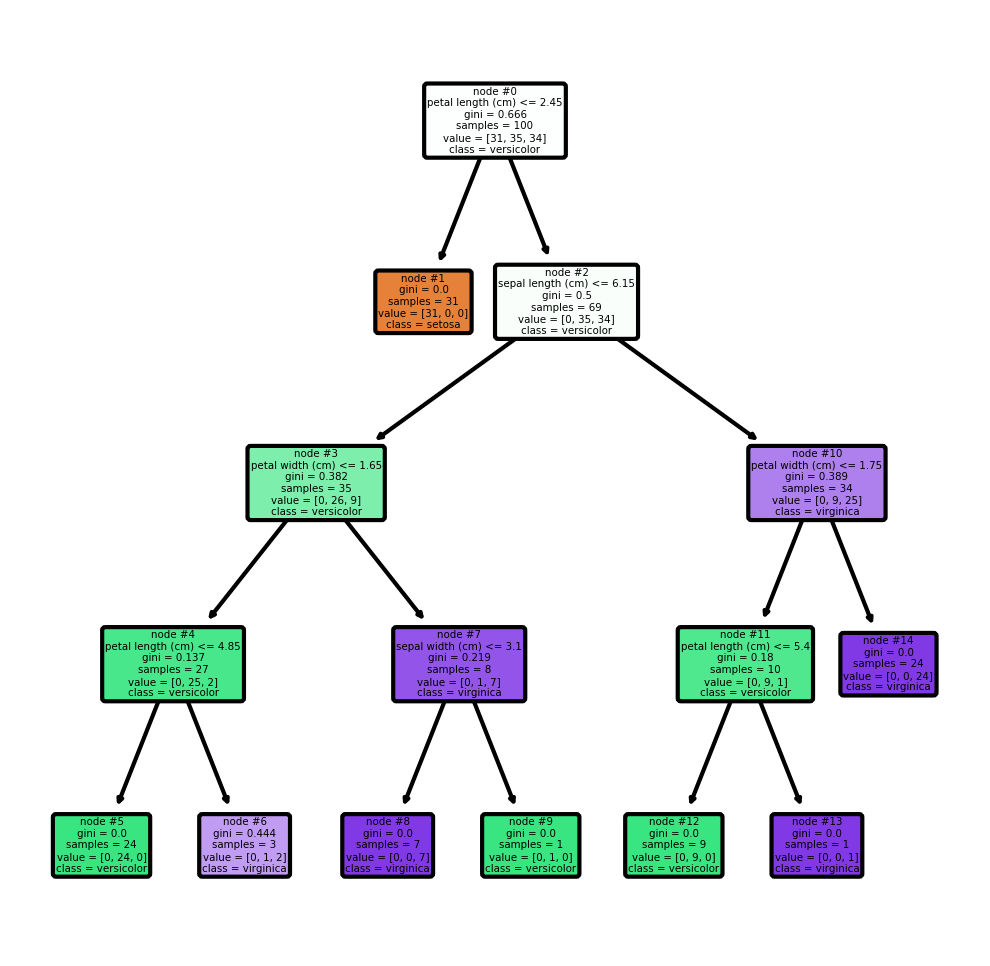

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
graph = tree.plot_tree(
    tree_clf,
    class_names=iris_set.target_names,
    feature_names=iris_set.feature_names,
    impurity=True,
    filled=True,
    rounded=True,
    node_ids=True
       
 
)

Una vez se seleccionan los nodos a partir de la menor impureza ponderada para cada partición el árbol queda representado así:

El primer nodo particiona sobre la longitud de los pétalos. Si la longitud del pétalo es menor a 2.45 cm se tiene un nodo hoja y se puede clasificar la planta como setosa. Si no es menor a este valor se llega a oto nodo (impuro) que impone una restricción sobre la longitud del sépalo, y así sucesivamente. Al final casi todos los nodos resultantes son hojas, salvo uno de ellos. No siempre es recomendable que todos sean nodos hojas porque puede tener lugar un overfitting: un ajuste muy bueno para el conjunto de datos de entrenamiento pero que pierde su capacidad predictiva.

In [22]:
print (f'precisión de los datos de entrenamiento : {model.score(x_train,y_train):.3f}')
print (f'precisión de los datos de prueba : {model.score(x_test,y_test):.3f}')


precisión de los datos de entrenamiento : 0.990
precisión de los datos de prueba : 0.980


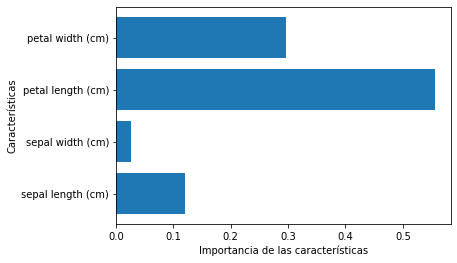

array([0.12086489, 0.02682129, 0.55570068, 0.29661314])

In [23]:
tree_clf.feature_importances_
caract = iris_set.data.shape[1]
plt.barh(range(caract), tree_clf.feature_importances_)
plt.yticks(np.arange(caract),iris_set.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()
tree_clf.feature_importances_

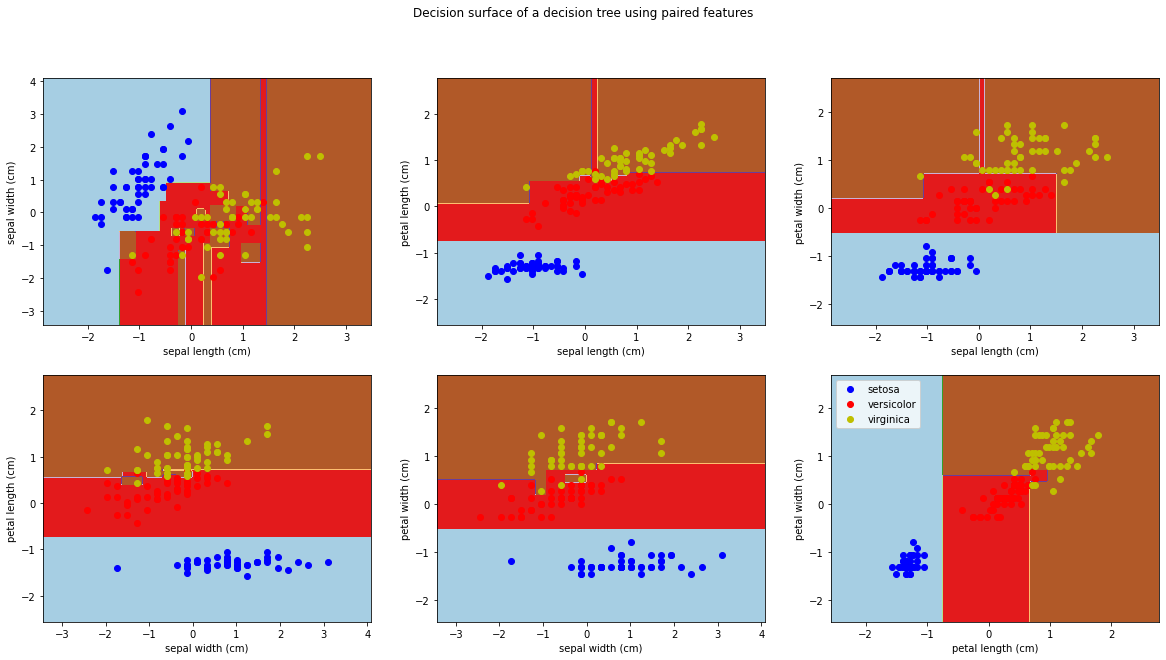

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data

plt.figure(figsize=(20,10))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris_set.data[:, pair]
    y = iris_set.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris_set.feature_names[pair[0]])
    plt.ylabel(iris_set.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris_set.target_names[i],
                    cmap=plt.cm.Paired)
    
    plt.axis("tight")
#plt.figure(figsize=(12,6))
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()